# Rice Image Classification

* [Google Colab Notebook](https://colab.research.google.com/drive/1okgDmgod2krjZRVMaosPTeJr9upHvuaP?usp=sharing)
* [Dataset](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset)


# Mount GDrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load the data

If you use google colab for training, you can use kaggle datasets directly with the help of a token. [Reference](https://www.kaggle.com/general/74235)

In [2]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                            Data Science Job Salaries                           7KB  2022-06-15 08:59:12          14680        474  1.0              
neelgajare/dogecoin-historical-price-data                     DogeCoin Historical Price Data                     34KB  2022-07-28 15:37:35            866         28  1.0              
himanshunakrani/student-study-hours                           Student Study Hours                                276B  2022-07-20 13:17:29            979         36  1.0              
zzettrkalpakbal/full-filled-brain-stroke-datas

In [3]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

!unzip /content/rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [4]:
IMAGE_DIR = "/content/Rice_Image_Dataset/"

In [5]:
# Remove txt file from the Image directory
import os
if os.path.exists(IMAGE_DIR+"Rice_Citation_Request.txt"):
  os.remove(IMAGE_DIR+"Rice_Citation_Request.txt")

# Create a list of all the class names
class_names = sorted(os.listdir(IMAGE_DIR))
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Split into train, test and validation data (using [splitfolders](https://pypi.org/project/split-folders/))

In [6]:
!pip install split-folders

import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Splitting the data into 3 datasets:**
* 70% in training dataset
* 20% in validation dataset
* 10% in testing dataset

In [7]:
splitfolders.ratio(IMAGE_DIR, output="IMAGES", seed=42, ratio=(.7, .2, .1))

Copying files: 75000 files [00:16, 4546.10 files/s]


In [8]:
# Defining the training, validation and testing directories
IMAGE_DIR = "/content/IMAGES/"

TRAIN_DIR = "/content/IMAGES/train/"
VAL_DIR = "/content/IMAGES/val/"
TEST_DIR = "/content/IMAGES/test/"

# View images in training dataset

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [10]:
def view_random_images(dirpath, class_names=class_names):
  """
  A utility function to view random images and their labels from the specified directory
  """
  plt.figure(figsize=(20, 14))
  for i in range(1, 6):
    class_name = random.choice(class_names)

    img = mpimg.imread(dirpath+class_name+"/"+random.choice(os.listdir(dirpath+class_name)))
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis(False)
    

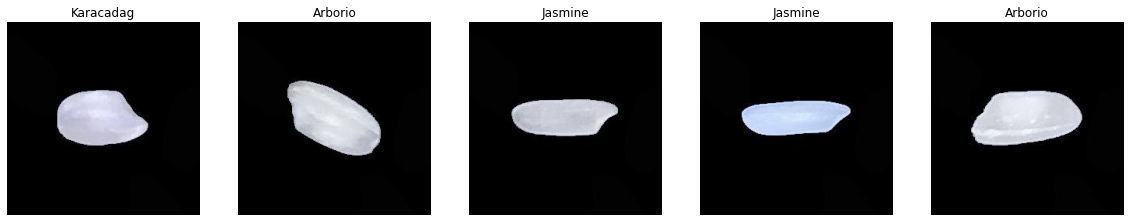

In [12]:
view_random_images(TRAIN_DIR, class_names=class_names)

# Create ImageDataGenerators

Create ImageDataGenerators to Rescale our images between 0 and 1 i.e., **Normalizing** the images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

Creating training, validation and testing data

In [ ]:
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

val_data = val_datagen.flow_from_directory(VAL_DIR,
                                           target_size=(224, 224),
                                           batch_size=32,
                                           class_mode="categorical")

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 52500 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


# Creating a basic model

In [ ]:
import tensorflow as tf

In [ ]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
Total params: 602,161
Trainable params: 602,161
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/5
1641/1641 [==============================] - 130s 76ms/step - loss: 0.6810 - accuracy: 0.7124 - val_loss: 0.4888 - val_accuracy: 0.7687
Epoch 2/5
1641/1641 [==============================] - 117s 71ms/step - loss: 0.4401 - accuracy: 0.7677 - val_loss: 0.4093 - val_accuracy: 0.7754
Epoch 3/5
1641/1641 [==============================] - 116s 71ms/step - loss: 0.4048 - accuracy: 0.7723 - val_loss: 0.3753 - val_accuracy: 0.7824
Epoch 4/5
1641/1641 [==============================] - 116s 71ms/step - loss: 0.3966 - accuracy: 0.7732 - val_loss: 0.3670 - val_accuracy: 0.7800
Epoch 5/5
1641/1641 [==============================] - 117s 71ms/step - loss: 0.3819 - accuracy: 0.7771 - val_loss: 0.3743 - val_accuracy: 0.7856


## Plot the curves

In [ ]:
def plot_curves(history):
  """
  A utility function that inputs a keras History object and plot the loss and accuracy (both training and validation) of the model 
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(20, 7))
  plt.rcParams['font.size'] = '16'

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


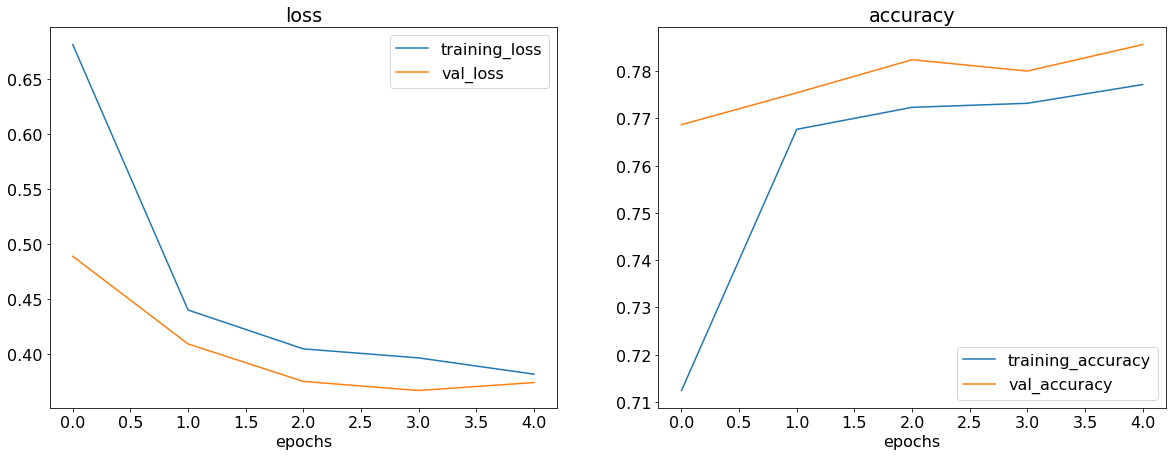

In [ ]:
plot_curves(history_1)

## Get predictions on testing data

In [ ]:
model_1.evaluate(test_data)

235/235 [==============================] - 13s 56ms/step - loss: 0.3649 - accuracy: 0.7851


[0.36485862731933594, 0.7850666642189026]

## Save the model

In [ ]:
model_1.save("/content/gdrive/MyDrive/Colab Notebooks/BEST CNN/rice-classification-models/model_1.h5")

# Improving the model (Adding Convolutional Layers)

In [ ]:
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 5)                 2376205   
                                                                 
Total params: 2,378,305
Trainable params: 2,378,305
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [ ]:
history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/5
1641/1641 [==============================] - 157s 89ms/step - loss: 0.1464 - accuracy: 0.9533 - val_loss: 0.1002 - val_accuracy: 0.9678
Epoch 2/5
1641/1641 [==============================] - 136s 83ms/step - loss: 0.0671 - accuracy: 0.9787 - val_loss: 0.0811 - val_accuracy: 0.9751
Epoch 3/5
1641/1641 [==============================] - 137s 84ms/step - loss: 0.0424 - accuracy: 0.9866 - val_loss: 0.0965 - val_accuracy: 0.9713
Epoch 4/5
1641/1641 [==============================] - 137s 83ms/step - loss: 0.0242 - accuracy: 0.9918 - val_loss: 0.1407 - val_accuracy: 0.9661
Epoch 5/5
1641/1641 [==============================] - 139s 85ms/step - loss: 0.0329 - accuracy: 0.9890 - val_loss: 0.1334 - val_accuracy: 0.9638


## Plot the curves

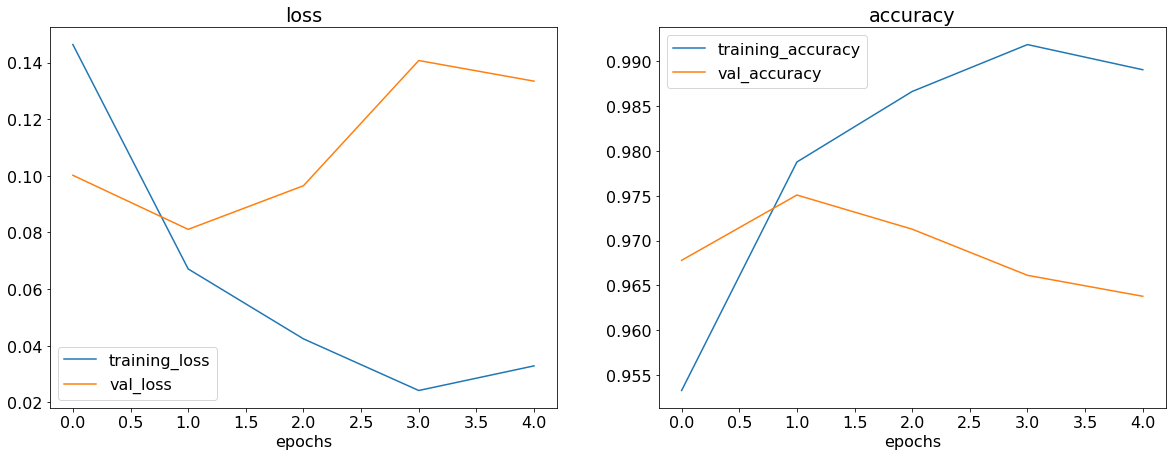

In [ ]:
plot_curves(history_2)

## Get predictions on testing data

In [ ]:
model_2.evaluate(test_data)

235/235 [==============================] - 15s 62ms/step - loss: 0.1412 - accuracy: 0.9633


[0.14119337499141693, 0.9633333086967468]

## Save the model

In [ ]:
model_2.save("/content/gdrive/MyDrive/Colab Notebooks/BEST CNN/rice-classification-models/model_2.h5")

# Improving the model further (Adding MaxPooling Layers)

In [ ]:
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),                                   
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

## Train the model

In [ ]:
history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=val_data,
            validation_steps=len(val_data))

Epoch 1/5
1641/1641 [==============================] - 138s 84ms/step - loss: 0.1474 - accuracy: 0.9489 - val_loss: 0.0694 - val_accuracy: 0.9768
Epoch 2/5
1641/1641 [==============================] - 128s 78ms/step - loss: 0.0555 - accuracy: 0.9813 - val_loss: 0.0334 - val_accuracy: 0.9902
Epoch 3/5
1641/1641 [==============================] - 125s 76ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.1269 - val_accuracy: 0.9620
Epoch 4/5
1641/1641 [==============================] - 126s 77ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0242 - val_accuracy: 0.9929
Epoch 5/5
1641/1641 [==============================] - 125s 76ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0338 - val_accuracy: 0.9908


## Plot the curves

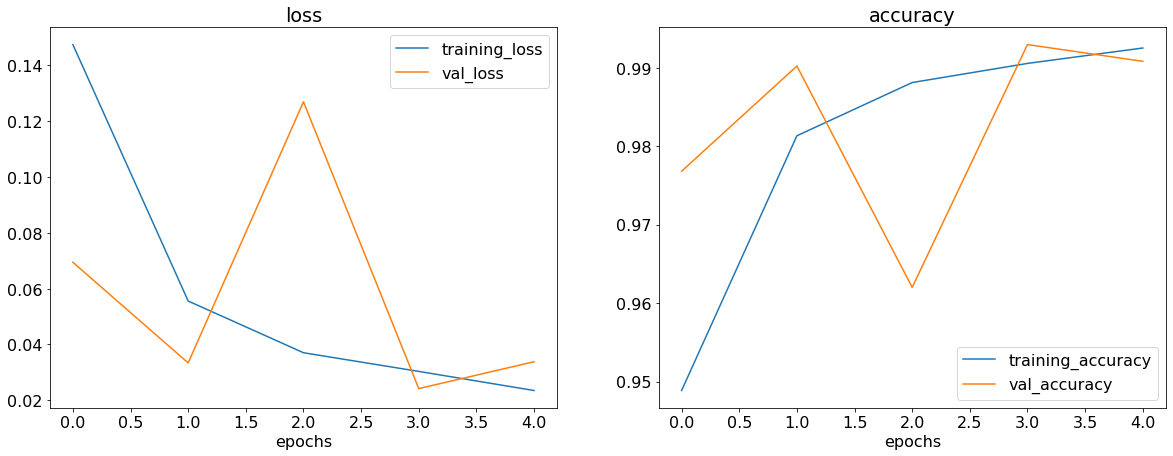

In [ ]:
plot_curves(history_3)

## Get predictions on testing data

In [ ]:
model_3.evaluate(test_data)

235/235 [==============================] - 13s 56ms/step - loss: 0.0283 - accuracy: 0.9921


[0.028284303843975067, 0.9921333193778992]

## Save the model

In [ ]:
model_3.save("/content/gdrive/MyDrive/Colab Notebooks/BEST CNN/rice-classification-models/model_3.h5")

# Predict a random image from testing dataset

In [ ]:
def pred_and_show(model, img_path, actual_class, class_names=class_names):
  """
  An utility function that uses the input model and makes prediction
  """
  # Read in the image
  img = tf.io.read_file(img_path)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [224, 224])
  # Rescale the image (get all values betwen 0 & 1)
  img = img/255.

  pred = model.predict(tf.expand_dims(img, 0))

  if len(class_names) > 2:
    class_name = class_names[int(tf.argmax(pred[0]))]
  else:
    class_name = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Actual: {actual_class}\nPredicted: {class_name}")
  plt.axis(False)

In [ ]:
def pred_random_image(model, dir_path=TEST_DIR, class_names=class_names):
  """
  This function selects a random image from the specified directory and then predicts the possible class by calling the pred_and_show function
  """
  random_class = random.choice(class_names)

  img_path = dir_path + random_class + "/" + random.choice(os.listdir(dir_path + random_class))
  
  pred_and_show(model, img_path, random_class, class_names)

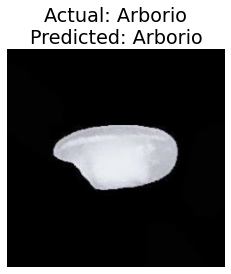

In [ ]:
pred_random_image(model_3, TEST_DIR, class_names)